In [18]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn import metrics



In [2]:
df = pd.read_csv('AirQualityodisha.csv')

In [3]:
df.describe()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
count,2392.000000,2392.000000,2392.000000,2392.000000,2060.000000
mean,486.654264,4.938545,17.698997,88.301003,42.472816
std,220.239379,4.244315,6.705531,39.879856,24.222975
min,68.000000,2.000000,5.000000,15.000000,5.000000
25%,322.000000,2.000000,12.000000,63.000000,28.000000
50%,428.000000,2.000000,16.000000,83.000000,40.000000
75%,694.000000,7.000000,23.000000,105.000000,50.000000
max,819.000000,37.000000,44.000000,590.000000,331.000000


In [4]:
df.shape

(2392, 11)

In [5]:
df.head(10)

,Stn Code,Sampling Date,State,City,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,68,02-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,11,24,143,102.0
1,68,06-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,10,23,133,96.0
2,68,09-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,8,25,125,116.0
3,68,13-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,10,25,137,107.0
4,68,16-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,9,26,186,118.0
5,68,20-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,10,23,178,153.0
6,68,23-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,11,26,171,146.0
7,68,27-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,11,26,161,137.0
8,68,30-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,12,24,158,127.0
9,68,03-02-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,8,24,207,152.0


In [6]:
X = df.iloc[:,7:8]
Y= df.iloc[:,8:9]
print(X)
print(Y)

      SO2
0      11
1      10
2       8
3      10
4       9
...   ...
2387    2
2388    2
2389    2
2390    2
2391    2

[2392 rows x 1 columns]
      NO2
0      24
1      23
2      25
3      25
4      26
...   ...
2387   10
2388   10
2389   10
2390   10
2391   10

[2392 rows x 1 columns]


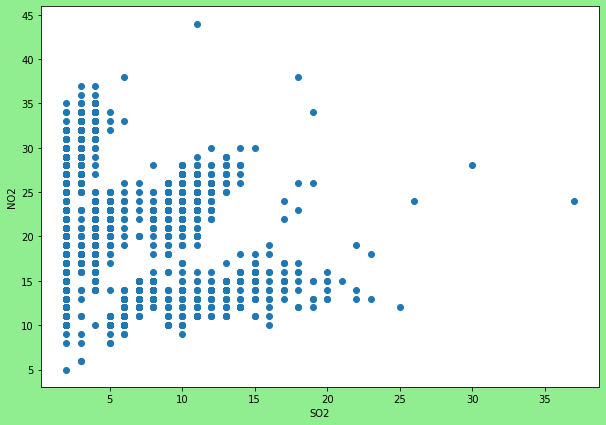

In [7]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(X,Y,);
plt.xlabel("SO2");
plt.ylabel("NO2")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle = 'True')

In [9]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1913
479
1913
479


In [10]:
model = LinearRegression()

In [35]:
reg=model.fit(x_train,y_train)

In [12]:
print (reg.coef_)
print (reg.intercept_)

[[0.23907771]]
[16.38021197]


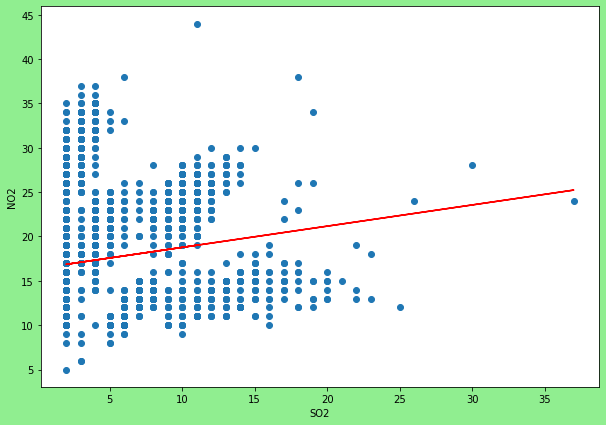

In [13]:
plt.figure(figsize=(10,7),facecolor="lightgreen")

plt.scatter(X,Y,);
plt.plot(df.SO2,X*reg.coef_[0]+reg.intercept_,color="red");

plt.xlabel("SO2");
plt.ylabel("NO2")

plt.show()

In [14]:
y_pred = model.predict(x_test)

In [15]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(len(y_pred))

1913
479
1913
479
479


In [26]:
# df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.to_numpy().flatten()})
# df
#y_test.shape
y_test = y_test.reshape(479,1)
y_pred = y_pred.reshape(479,1)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


In [27]:
df

,Actual,Predicted
0,21,17.336523
1,19,16.858367
2,23,17.336523
3,21,16.858367
4,20,17.336523
...,...,...
474,16,16.858367
475,20,16.858367
476,23,17.575601
477,20,16.858367


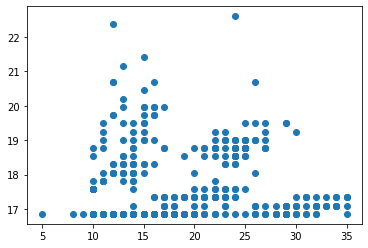

In [28]:
plt.scatter(y_test, y_pred)

(array([ 2., 88., 99., 47., 71., 76., 31., 21., 27., 17.]),
 array([-11.85836739,  -8.85836739,  -5.85836739,  -2.85836739,
          0.14163261,   3.14163261,   6.14163261,   9.14163261,
         12.14163261,  15.14163261,  18.14163261]),
 <BarContainer object of 10 artists>)

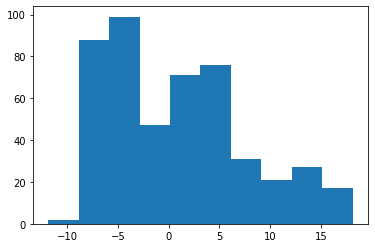

In [29]:
plt.hist(y_test - y_pred)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.625197460766388


In [31]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 46.818449806385445


In [32]:
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 6.842400880274806


In [33]:
1 - (1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)

0.01812499913896992

In [34]:
model.score(X, Y)

0.01853565367718024